In [1]:
import fridom.nonhydro as nh
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec, ticker

# ----------------------------------------------------------------
#  Constants
# ----------------------------------------------------------------

RESOLUTION_FACTOR = 8
ROSSBY_NUMBER = 0.1  # advection scale
INERTIAL_PERIOD = 2.0 * np.pi
RAMP_PERIOD = INERTIAL_PERIOD / ROSSBY_NUMBER
DIAGNOSING_PERIOD = 3 * INERTIAL_PERIOD / ROSSBY_NUMBER

# ================================================================
#  Setup
# ================================================================
# Scale parameters
height_scale = 1e3
length_scale = 5e4
dsqr = (height_scale / length_scale)**2

# ================================================================
#  Setup
# ================================================================

lx = ly = 2 * np.pi
nx = ny = 2**RESOLUTION_FACTOR - 1
lz = 1
nz = 2**(RESOLUTION_FACTOR - 2) - 1

# construct grid and modelsettings
grid = nh.grid.cartesian.Grid(N=(nx, ny, nz), L=(lx, ly, lz),
                            periodic_bounds=(True, True, False))
mset = nh.ModelSettings(grid, f0=1.0, beta=0.0, N2=1.0,
                        dsqr=dsqr, Ro=ROSSBY_NUMBER, halo=2).setup()

base_dir = "../data/examples/nh_jet/"
z_ini = nh.State.from_netcdf(mset, f"{base_dir}/z_ini.nc")
z_ini_bal = nh.State.from_netcdf(mset, f"{base_dir}/z_ini_bal.nc")
z_evo = nh.State.from_netcdf(mset, f"{base_dir}/z_evo.nc")
z_evo_bal = nh.State.from_netcdf(mset, f"{base_dir}/z_evo_bal.nc")

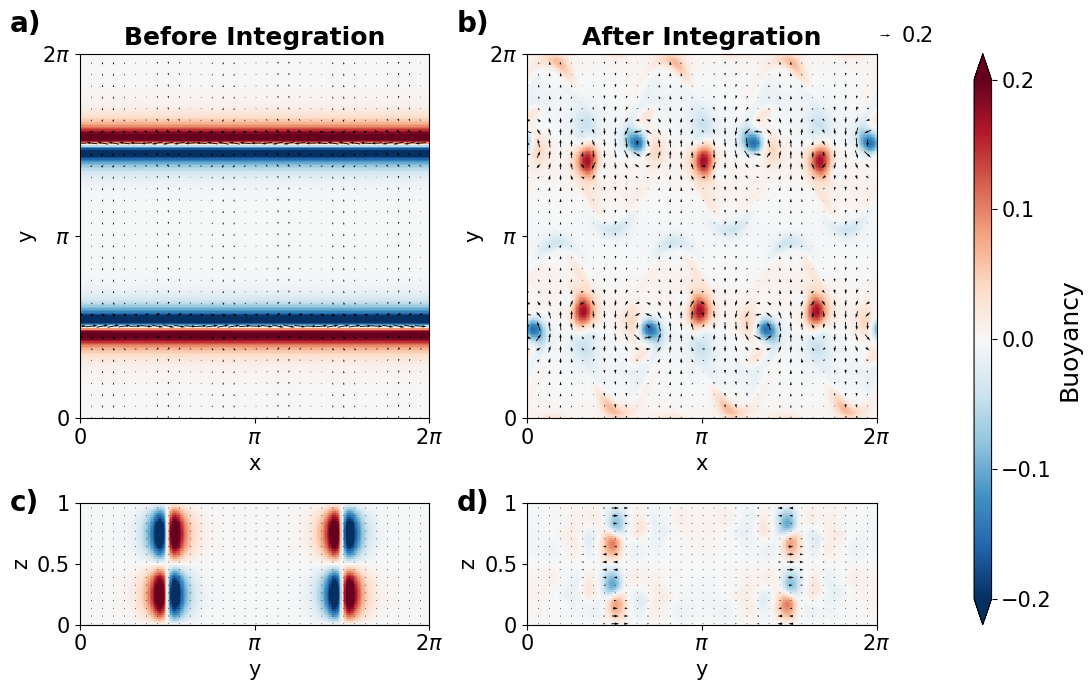

In [2]:
fig = plt.figure(figsize=(11, 7), tight_layout=True)
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], height_ratios=[3, 1])
axs = [[fig.add_subplot(gs[i, j]) for j in range(2)] for i in range(2)]

sk = 8

z_ini_bal.b.xrs[:,:,20].plot(ax=axs[0][0], vmax=0.2, add_colorbar=False)
z_ini_bal.xrs[::sk,::sk,20].plot.quiver(
    "x", "y", "u", "v", ax=axs[0][0], scale=7, add_guide=False)

z_evo.b.xrs[:,:,20].plot(ax=axs[0][1], vmax=0.2, add_colorbar=False)
q = z_evo.xrs[::sk,::sk,20].plot.quiver(
    "x", "y", "u", "v", ax=axs[0][1], scale=7, add_guide=False)

im = z_ini_bal.b.xrs[0,:,:].plot(ax=axs[1][0], vmax=0.2, add_colorbar=False)
z_ini_bal.xrs[0,::sk,::4].plot.quiver(
    "y", "z", "v", "w", ax=axs[1][0], scale=7, add_guide=False)

z_evo.b.xrs[0,:,:].plot(ax=axs[1][1], vmax=0.2, add_colorbar=False)
z_evo.xrs[0,::sk,::4].plot.quiver(
    "y", "z", "v", "w", ax=axs[1][1], scale=7, add_guide=False)

# Add quiver key
qk = axs[0][1].quiverkey(q, 1.04, 1.05, 0.2, r"$0.2$", labelpos="E",
                         coordinates="axes", fontproperties={"size": 15})

labels = iter(["a)", "b)", "c)", "d)"])

axs[0][0].set_title("Before Integration", fontsize=18, fontweight="bold")
axs[0][1].set_title("After Integration", fontsize=18, fontweight="bold")

for ax in axs[0]:
    ax.set_xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    ax.set_yticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    ax.set_xlabel("x", fontsize=15)
    ax.set_ylabel("y", fontsize=15)
    ax.text(-0.2, 1.12, next(labels), fontsize=20, fontweight="bold",
            transform=ax.transAxes, va="top", ha="left")


for ax in axs[1]:
    ax.set_xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    ax.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=15)
    ax.set_xlabel("y", fontsize=15)
    ax.set_ylabel("z", fontsize=15)
    ax.text(-0.2, 1.12, next(labels), fontsize=20, fontweight="bold",
            transform=ax.transAxes, va="top", ha="left")

# Add a colorbar in the third column
cbar_ax = fig.add_subplot(gs[:, 2])
cbar = fig.colorbar(im, cax=cbar_ax, orientation="vertical", extend="both")
cbar.set_ticks([-0.2, -0.1, 0, 0.1, 0.2])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Buoyancy", fontsize=18)

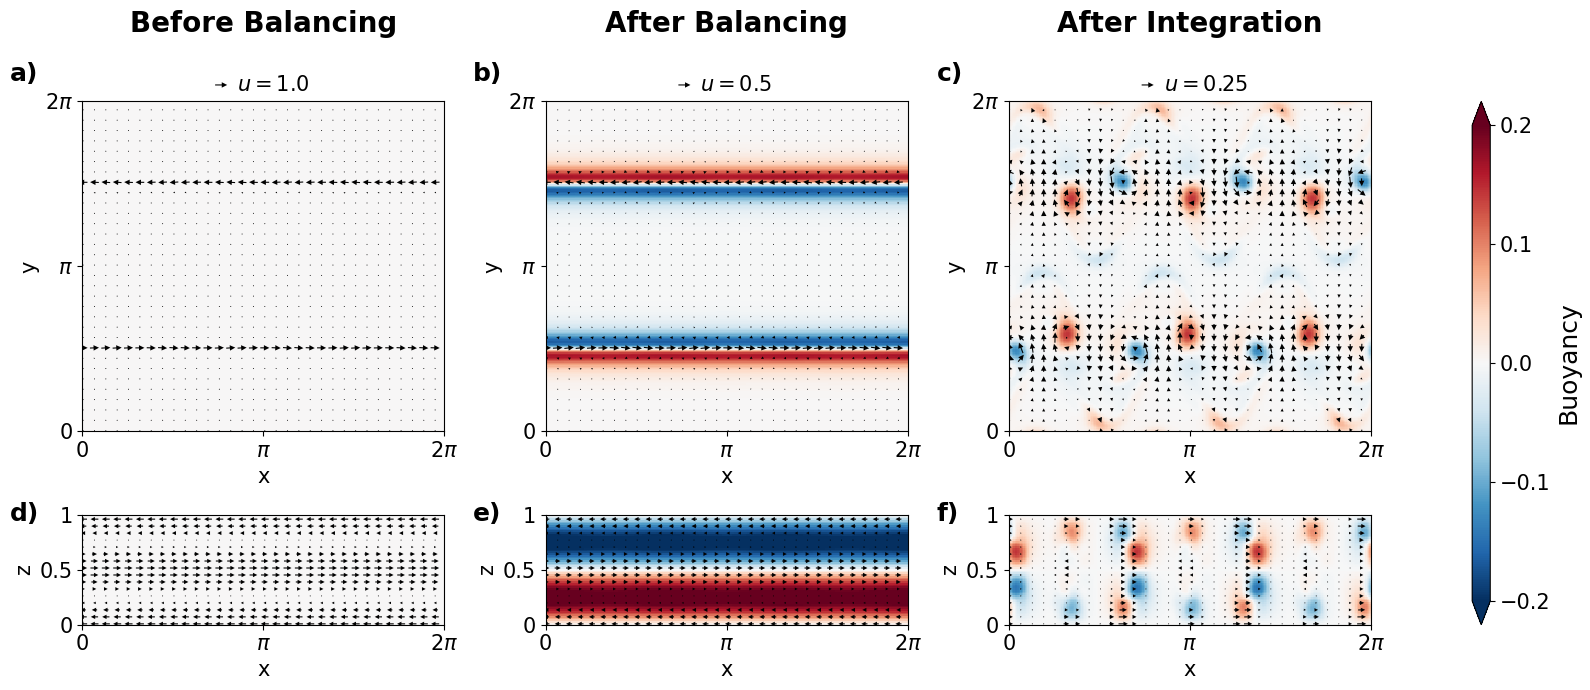

In [89]:
fig = plt.figure(figsize=(16, 7), tight_layout=True)
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[3, 1])
axs = np.array([[fig.add_subplot(gs[i, j]) for j in range(3)] for i in range(2)])
labels = iter(["a)", "b)", "c)", "d)", "e)", "f)"])

sk = 8
yind = 60
zind = 24

for axes, z, umax in zip(axs.T, [z_ini, z_ini_bal, z_evo],
                          [1.0, 0.5, 0.25]):
    im = z.b.xrs[:,:,zind].plot(ax=axes[0], vmin=-0.2, vmax=0.2,
                              add_colorbar=False, cmap="RdBu_r")

    qi = z.xrs[::sk,::sk,zind].plot.quiver(
        "x", "y", "u", "v", ax=axes[0], scale=30*umax, add_guide=False,
        width=0.003, headwidth=5, headaxislength=5, headlength=5)
    qk = axes[0].quiverkey(qi, 0.4, 1.05, umax, f"$u={umax}$", labelpos="E",
                            coordinates="axes", fontproperties={"size": 15})

    im = z.b.xrs[:,yind,:].plot(ax=axes[1], vmin=-0.2, vmax=0.2,
                             add_colorbar=False, cmap="RdBu_r")

    z.xrs[::sk,yind,::4].plot.quiver(
        "x", "z", "u", "w", ax=axes[1], scale=30*umax, add_guide=False,
        width=0.003, headwidth=4, headaxislength=4, headlength=4)

    axes[0].set_xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    axes[0].set_yticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    axes[0].set_xlabel("x", fontsize=15)
    axes[0].set_ylabel("y", fontsize=15)

    axes[1].set_xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    axes[1].set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=15)
    axes[1].set_xlabel("x", fontsize=15)
    axes[1].set_ylabel("z", fontsize=15)

for ax in axs.flatten():
    ax.text(-0.2, 1.12, next(labels), fontsize=18, fontweight="bold",
            transform=ax.transAxes, va="top", ha="left")

for ax, title in zip(axs[0], ["Before Balancing", "After Balancing", "After Integration"]):
    ax.set_title(title, fontsize=20, fontweight="bold", pad=50)

# Add a colorbar in the third column
cbar_ax = fig.add_subplot(gs[:, 3])
cbar = fig.colorbar(im, cax=cbar_ax, orientation="vertical", extend="both")
cbar.set_ticks([-0.2, -0.1, 0, 0.1, 0.2])
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Buoyancy", fontsize=18)

plt.savefig("../figures/nh_jet_config.png", dpi=200, bbox_inches="tight")

In [90]:
grid.x_global[1][yind], grid.x_global[2][zind]

(Array(1.49071651, dtype=float64), Array(0.38888889, dtype=float64))

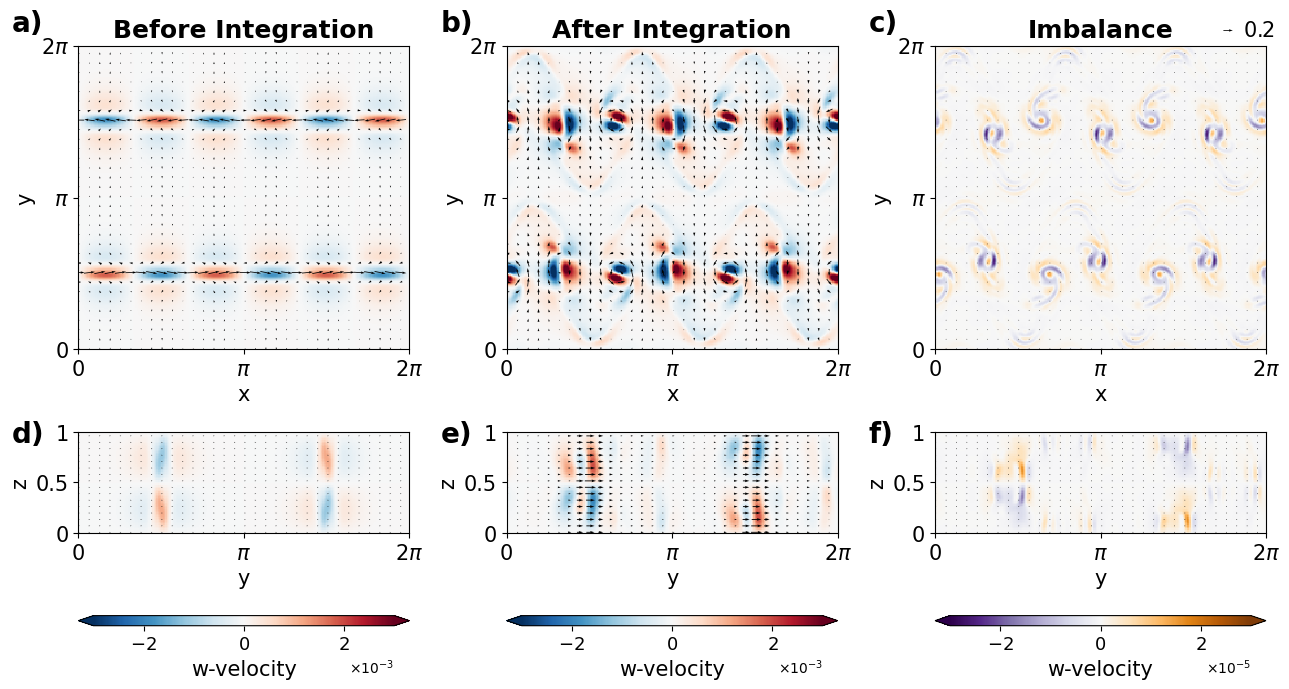

In [10]:
fig = plt.figure(figsize=(13, 7), tight_layout=True)
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[3, 1, 0.1])
axs = [[fig.add_subplot(gs[i, j]) for j in range(3)] for i in range(3)]

zpos = 20
xpos = 8

z = [z_ini_bal, z_evo, z_evo - z_evo_bal]

vmax = [0.003, 0.003, 3e-5]
cmaps = ["RdBu_r", "RdBu_r", "PuOr_r"]
labels = iter(["a)", "b)", "c)", "d)", "e)", "f)"])

im = [zi.w.xrs[:,:,zpos].plot(ax=axs[0][i], add_colorbar=False, vmax=vmax[i], cmap=cmaps[i])
      for i, zi in enumerate(z)]

_ = [zi.w.xrs[xpos,:,:].plot(ax=axs[1][i], vmax=vmax[i], add_colorbar=False, cmap=cmaps[i])
     for i, zi in enumerate(z)]

q = [zi.xrs[::sk,::sk,zpos].plot.quiver(
    "x", "y", "u", "v", ax=axs[0][i], scale=7, add_guide=False)
    for i, zi in enumerate(z)]

_ = [zi.xrs[xpos,::sk,::4].plot.quiver(
    "y", "z", "v", "w", ax=axs[1][i], scale=7, add_guide=False)
    for i, zi in enumerate(z)]


# Add quiver key
qk = axs[0][2].quiverkey(q[2], 0.9, 1.05, 0.2, r"$0.2$", labelpos="E",
                         coordinates="axes", fontproperties={"size": 15})

axs[0][0].set_title("Before Integration", fontsize=18, fontweight="bold")
axs[0][1].set_title("After Integration", fontsize=18, fontweight="bold")
axs[0][2].set_title("Imbalance", fontsize=18, fontweight="bold")

for ax in axs[0]:
    ax.set_xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    ax.set_yticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    ax.set_xlabel("x", fontsize=15)
    ax.set_ylabel("y", fontsize=15)
    ax.text(-0.2, 1.12, next(labels), fontsize=20, fontweight="bold",
            transform=ax.transAxes, va="top", ha="left")


for ax in axs[1]:
    ax.set_xticks([0, np.pi, 2*np.pi], ["0", r"$\pi$", r"$2\pi$"], fontsize=15)
    ax.set_yticks([0, 0.5, 1], [0, 0.5, 1], fontsize=15)
    ax.set_xlabel("y", fontsize=15)
    ax.set_ylabel("z", fontsize=15)
    ax.text(-0.2, 1.12, next(labels), fontsize=20, fontweight="bold",
            transform=ax.transAxes, va="top", ha="left")

for i, image in enumerate(im):
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((9, 10))
    cbar = fig.colorbar(image, cax=axs[2][i], orientation="horizontal", extend="both")
    cbar.ax.xaxis.set_major_formatter(formatter)

    cbar.ax.tick_params(labelsize=13)
    cbar.set_label("w-velocity", fontsize=15)

plt.savefig("../figures/example_jet_nh.png", dpi=200)